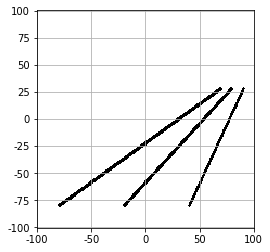

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

def proj_img(N): # Cria imagem branca 2N+1 x 2N+1 (centro em (N,N)), e imprime eixos x e y
    img = 255 * np.ones((2*N+1,2*N+1))
    plt.xticks(np.arange(0, 2*N+1, step=50), np.arange(-N, N+1, step=50))
    plt.yticks(np.arange(2*N, -1, step=-25), np.arange(-N, N+1, step=25))
    plt.grid(True)
    return img

N, f = 100, 100
perspectiva  = np.array([[f, 0, 0, 0],
                         [0, f, 0, 0],
                         [0, 0, 1, 0]])
points = [np.array([-200,-200,250]), np.array([-50,-200,250]), np.array([100,-200,250])]
d = 600 * np.array([2,1,2]) # converge para (f*d[0]/d[2], f*d[1]/d[2]) = f*(1,0.5) = (100,50)

img = proj_img(N)
for p in points:
    h = perspectiva.dot(np.append(p,1))
    p1 = [int(np.rint(h[0]/h[2])), int(np.rint(h[1]/h[2]))]
    
    p = np.add(p,d)
    h = perspectiva.dot(np.append(p,1))
    p2 = [int(np.rint(h[0]/h[2])), int(np.rint(h[1]/h[2]))]
    
    cv2.line(img, tuple(np.add([N,N],p1)), tuple(np.add([N,N],p2)), (0,0,0), 2)
plt.imshow(np.flip(img,0),'gray'); plt.show() # inverte eixo y

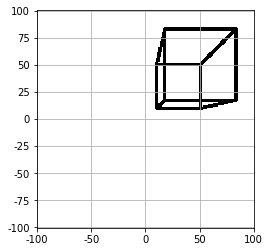

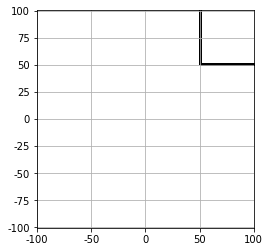

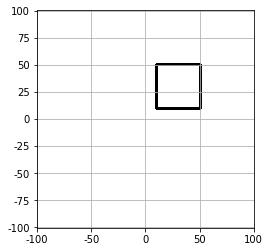

In [63]:
cubo = np.float32([ [[-1,-1,-1],[ 1,-1,-1]], [[-1,-1,-1],[-1, 1,-1]], [[ 1, 1,-1],[-1, 1,-1]], [[ 1, 1,-1],[ 1,-1,-1]],
                    [[-1,-1, 1],[ 1,-1, 1]], [[-1,-1, 1],[-1, 1, 1]], [[ 1, 1, 1],[-1, 1, 1]], [[ 1, 1, 1],[ 1,-1, 1]],
                    [[-1,-1,-1],[-1,-1, 1]], [[ 1,-1,-1],[ 1,-1, 1]], [[-1, 1,-1],[-1, 1, 1]], [[ 1, 1,-1],[ 1, 1, 1]] ])

perspectiva  = np.float32([[f, 0, 0, 0],
                           [0, f, 0, 0],
                           [0, 0, 1, 0]])
orthographic = np.float32([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 0, 1]])
weak_persp   = np.float32([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 0, 5]])

translacao = np.float32([150,150,400])
for M in [perspectiva, orthographic, weak_persp]:
    img = proj_img(N)
    for linha in cubo*100:
        p = np.add(linha[0],translacao)
        h = M.dot(np.append(p,1))
        p1 = [int(np.rint(h[0]/h[2])), int(np.rint(h[1]/h[2]))]
    
        p = np.add(linha[1],translacao)
        h = M.dot(np.append(p,1))
        p2 = [int(np.rint(h[0]/h[2])), int(np.rint(h[1]/h[2]))]
    
        cv2.line(img, tuple(np.add([N,N],p1)), tuple(np.add([N,N],p2)), (0,0,0), 2)
    plt.imshow(np.flip(img,0),'gray'); plt.show()

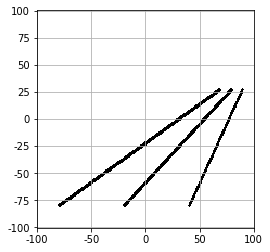

In [64]:
# Usando OpenCV para calcular a projeção

img = proj_img(N)

M = np.float32(perspectiva[:,:-1]) # Última coluna de 'perspectiva' não é utilizada
for p in np.float32(points):
    p1,jacob = cv2.projectPoints(np.array([p]), np.zeros(3), np.zeros(3), M, None)
    p2,jacob = cv2.projectPoints(np.array([np.add(p,d)]), np.zeros(3), np.zeros(3), M, None)
    cv2.line(img, tuple(np.add([N,N],p1.squeeze().astype(np.int))), tuple(np.add([N,N],p2.squeeze().astype(np.int))), (0,0,0), 2)

plt.imshow(np.flip(img,0),'gray'); plt.show()

[[ 0.707 -0.707  0.   ]
 [ 0.707  0.707  0.   ]
 [ 0.     0.     1.   ]]


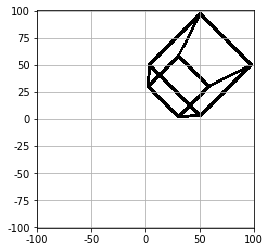

In [65]:
# Rodrigues: fornece matriz de rotação, recebendo o ângulo em cada eixo.
np.set_printoptions(precision=3,suppress=True)
rotacao = cv2.Rodrigues(np.float32([0,0,np.pi/4]))[0]
print(rotacao)

# Rotaciona os pontos antes de projetar
img = proj_img(N)
for linha in cubo*100:
    p = rotacao.dot(linha[0])
    p = np.add(p,translacao)
    h = perspectiva.dot(np.append(p,1))
    p1 = [int(np.rint(h[0]/h[2])), int(np.rint(h[1]/h[2]))]
    
    p = rotacao.dot(linha[1])
    p = np.add(p,translacao)
    h = perspectiva.dot(np.append(p,1))
    p2 = [int(np.rint(h[0]/h[2])), int(np.rint(h[1]/h[2]))]
    
    cv2.line(img, tuple(np.add([N,N],p1)), tuple(np.add([N,N],p2)), (0,0,0), 2)
plt.imshow(np.flip(img,0),'gray'); plt.show()

(3, 3)


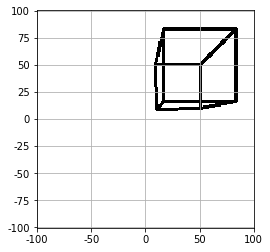

In [68]:
from IPython.display import clear_output
import time

def draw_lines(linhas3D, camera, rotacao=np.float32([0,0,0]), translacao=np.float32([0,0,0]), N=100):
    img = proj_img(N)
    for linha in linhas3D:
        p,jacob = cv2.projectPoints(linha, rotacao, translacao, camera, None)
        cv2.line(img, tuple(np.add([N,N],p[0].squeeze()).astype(int)), tuple(np.add([N,N],p[1].squeeze()).astype(int)), (0,0,0), 2)
    plt.imshow(np.flip(img,0),'gray'); plt.show()
        
def anima_rotacao(translacao=np.float32([0,0,0]), angulo=np.pi/2, steps=20, eixos=(0,0,1)):
    for u in range(steps+1):
        clear_output()
        rotacao = np.float32([eixos[0]*u*angulo/steps, eixos[1]*u*angulo/steps, eixos[2]*u*angulo/steps])
        print(perspectiva[:,:-1].shape)
        draw_lines(cubo*100, perspectiva[:,:-1], rotacao, translacao)
        time.sleep(0.5)    

anima_rotacao(translacao, eixos=(0,0,1))

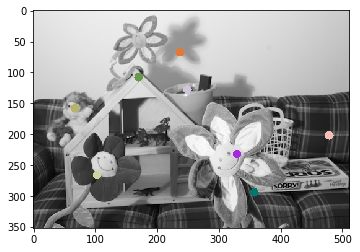

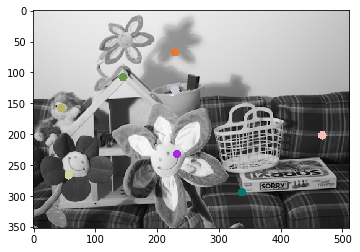

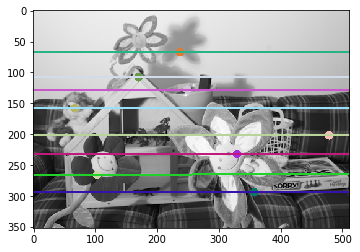

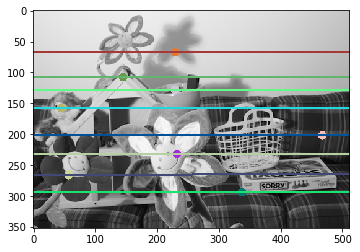

In [555]:
imgL = cv2.cvtColor(cv2.imread('images/flowers-left.png',0), cv2.COLOR_GRAY2BGR)
imgR = cv2.cvtColor(cv2.imread('images/flowers-right.png',0), cv2.COLOR_GRAY2BGR)

ptsL = np.array([(170,108), (357,294), (103,266), (249,128), (237,68), (329,232), (478,202), (67,158)])
ptsR = np.array([(145,108), (337,294),  (57,266), (229,128), (229,68), (232,232), (467,202), (45,158)])

for i in range(len(ptsL)):
    color = tuple(np.random.randint(0,255,3).tolist())
    cv2.circle(imgL, tuple(ptsL[i]), 7, color, -1)
    cv2.circle(imgR, tuple(ptsR[i]), 7, color, -1)
plt.imshow(cv2.cvtColor(imgL,cv2.COLOR_BGR2RGB)); plt.show()
plt.imshow(cv2.cvtColor(imgR,cv2.COLOR_BGR2RGB)); plt.show()

F, mask = cv2.findFundamentalMat(ptsL,ptsR,cv2.FM_RANSAC)
ptsL = ptsL[mask.ravel()==1] # Remove pontos não escolhidos pelo RANSAC. Com apenas 8 todos são escolhidos.
ptsR = ptsR[mask.ravel()==1]

# Impressão das linhas epipolares
c = imgL.shape[1]
linesL = cv2.computeCorrespondEpilines(ptsR.reshape(-1,1,2),2,F).reshape(-1,3)
for r in linesL: # linha r = (r[0],r[1],r[2]), onde r[0]x + r[1]y + r[2] = 0.
    color = tuple(np.random.randint(0,255,3).tolist())
    cv2.line(imgL, (0,int(-r[2]/r[1])), (c,int(-(r[2]+r[0]*c)/r[1])), color,2)
linesR = cv2.computeCorrespondEpilines(ptsL.reshape(-1,1,2),2,F).reshape(-1,3)
for r in linesR:
    color = tuple(np.random.randint(0,255,3).tolist())
    cv2.line(imgR, (0,int(-r[2]/r[1])), (c,int(-(r[2]+r[0]*c)/r[1])), color,2)

plt.imshow(cv2.cvtColor(imgL,cv2.COLOR_BGR2RGB)); plt.show()
plt.imshow(cv2.cvtColor(imgR,cv2.COLOR_BGR2RGB)); plt.show()

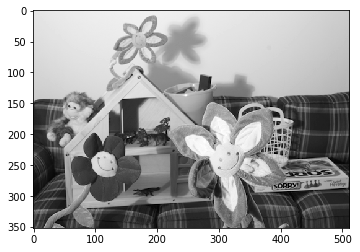

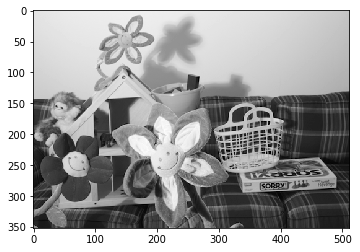

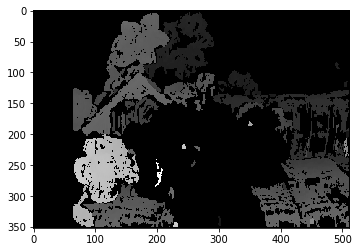

In [461]:
imgL = cv2.imread('images/flowers-left.png',0)
imgR = cv2.imread('images/flowers-right.png',0)
plt.imshow(imgL,'gray'); plt.show()
plt.imshow(imgR,'gray'); plt.show()

stereo = cv2.StereoBM_create(numDisparities=64, # Máximo de disparidades (em pixels) a serem testada 
                                                # acima de minDisparity. Perde esta qte de pixels no lado esq.
                                                # Múltiplo de 16. Flor da direita só aparece com 128.
                             blockSize=5) # Tamanho do bloco a ser comparado (ímpar). Menos ruído->Menos detalhes
#stereo.setMinDisparity(4) # Menor disparidade a ser testada. Default: 0
stereo.setSpeckleRange(4) # Máxima disparidade permitida em cada componente conexa. Será multiplicado por 16.
                          # Ao avaliar os vizinhos de um pixel, conecta apenas de a disparidade for <= ao range.
stereo.setSpeckleWindowSize(40) # Maior tam. de região suave que será considerada ruído (e removida).
# Mais detalhes em help(cv2.StereoSGBM_create) e help(cv2.StereoMatcher)

disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray'); plt.show()

### Retificação estéreo
<img src="images/teoria/camera_alignment.png" width="300">

### Distorção radial
Modelado como erro de aproximação de uma série de Taylor em torno do zero, e apenas as potências pares (função simétrica).
$$x_\text{corrigido} = x (1+k_1 r^2 + k_2 r^4 + k_3 r^6)$$
$$y_\text{corrigido} = y (1+k_1 r^2 + k_2 r^4 + k_3 r^6)$$
Onde $r = \sqrt{x^2 + y^2}$ é a distância até o centro.

### Distorção tangencial
$$x_\text{corrigido} = x + [2p_1 xy + p_2(r^2+2x^2)]$$
$$y_\text{corrigido} = y + [p_1(r^2+2y^2)+2p_2 xy]$$
<img src="images/teoria/tangential_distortion.png" width="500">

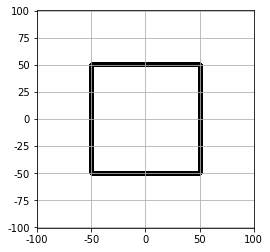

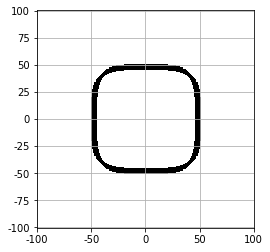

In [58]:
# Distorção radial
img = proj_img(N)
cv2.line(img, (-50+N,50+N), (50+N,50+N), (0,0,0), 3)
cv2.line(img, (-50+N,-50+N), (50+N,-50+N), (0,0,0), 3)
cv2.line(img, (-50+N,50+N), (-50+N,-50+N), (0,0,0), 3)
cv2.line(img, (50+N,50+N), (50+N,-50+N), (0,0,0), 3)
plt.imshow(np.flip(img,0),'gray'); plt.show()

img = proj_img(N)
k1 = k2 = k3 = 2e-12
for i in np.arange(-50,50,1):
    for (x,y) in [(50,i), (-50,i), (i,50), (i,-50)]:
        r = np.linalg.norm((x,y),2) # (x,y) como aproximação de (x_corrigido, y_corrigido)
        f = 1 + k1*r**2 + k2*r**4 + k3*r**6
        p = (int(np.rint(x/f)) + N, int(np.rint(y/f)) + N)
        cv2.circle(img, p, 2, (0,0,0), -1)
plt.imshow(np.flip(img,0),'gray'); plt.show()

(393, 512)


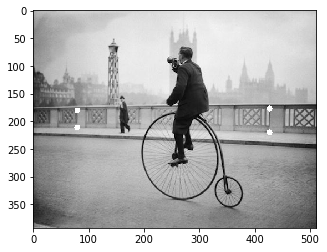

[[  1.618   0.    -41.171]
 [  0.23    1.097 -18.145]
 [  0.001  -0.      1.   ]] (3, 3)
79 180
79 211
426 180
426 211


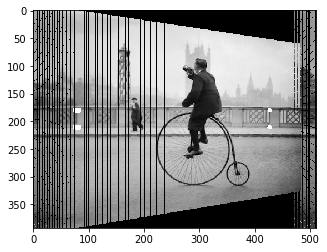

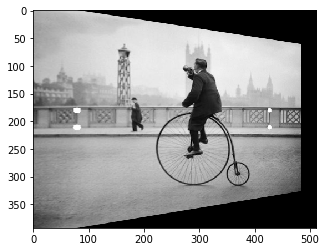

In [156]:
# Homografia
img = cv2.imread('images/penny-farthing.png',0)
print(img.shape)

src = np.array([(79,180), (79,211), (426,177), (426,220)])
dst = np.array([(79,180), (79,211), (426,180), (426,211)])

for p in src:
    cv2.circle(img, (p[0],p[1]), 5, (255,255,255), -1)
plt.imshow(img,'gray'); plt.show()

M = np.array(cv2.findHomography(src, dst, cv2.RANSAC))[0]
print(M, M.shape)

for p in src:
    h = M.dot(np.append(p,1))
    x,y = int(np.rint(h[0]/h[2])), int(np.rint(h[1]/h[2]))
    print(x,y)

img2 = np.zeros(img.shape)
for j in range(img.shape[0]):
    for i in range(img.shape[1]):
        h = M.dot(np.array([i,j,1]))
        y,x = int(np.rint(h[0]/h[2])), int(np.rint(h[1]/h[2]))
        if x < img.shape[0] and y < img.shape[1]:
            img2[x,y] = img[j,i]
plt.imshow(img2,'gray'); plt.show()

# Usando OpenCV
M = np.array(cv2.findHomography(src, dst, cv2.RANSAC))[0]
img2 = cv2.warpPerspective(img, M, (img.shape[1],img.shape[0]))
plt.imshow(img2,'gray'); plt.show()

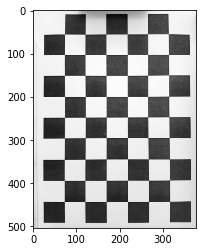

(504, 378, 3)


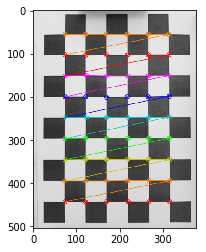

In [2]:
img = cv2.imread('images/camera/01.jpg')
#img = cv2.pyrDown(cv2.pyrDown(cv2.pyrDown(img)))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,'gray'); plt.show()
print(img.shape)

ret,corners = cv2.findChessboardCorners(gray, (6,9))
cv2.drawChessboardCorners(img, (6,9), corners, ret)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)); plt.show()

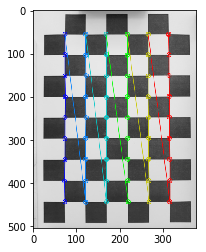

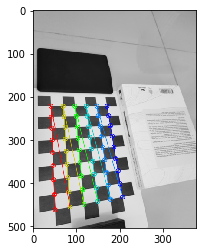

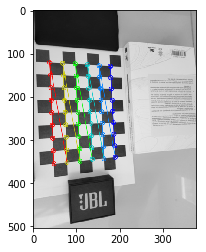

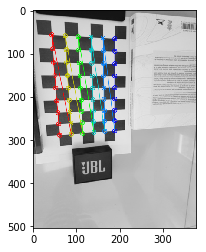

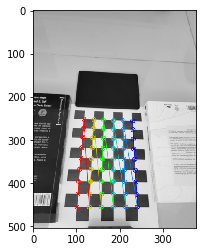

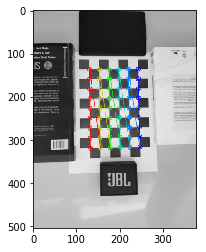

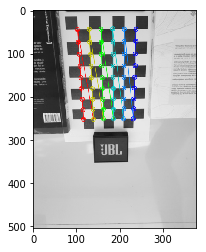

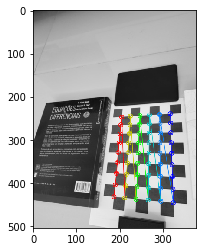

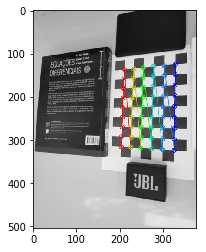

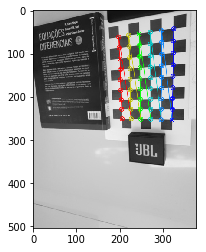

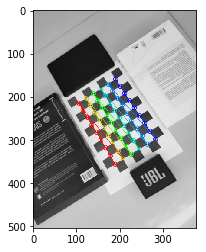

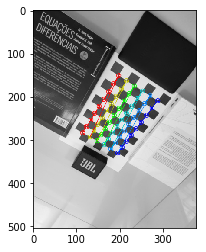

In [3]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html
# https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html
import glob

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
objp *= 2.5 # cada quadrado tem 2,5 cm de largura

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for fname in sorted(glob.glob('images/camera/*.jpg')):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img); plt.show()

In [4]:
#help(cv2.calibrateCamera)
#cv2.calibrateCamera(
#    objectPoints, # K vecs (N pts each, object frame)
#    imagePoints, # K vecs (N pts each, image frame)
#    imageSize, # Size of input images (pixels)
#    cameraMatrix, # Resulting 3-by-3 camera matrix
#    distCoeffs, # Vector of 4, 5, or 8 coefficients
#    rvecs, # Vector of K rotation vectors
#    tvecs, # Vector of K translation vectors
#    flags = 0, # Flags control calibration options
#    criteria = (cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS,
#        30, # ...after this many iterations
#        0.001) # ...at this total reprojection error

#The algorithm performs the following steps:
# 1) Compute the initial intrinsic parameters (the option only available for planar calibration patterns) or read them from the input parameters. The distortion coefficients are all set to zeros initially unless some of CV_CALIB_FIX_K? are specified.
# 2) Estimate the initial camera pose as if the intrinsic parameters have been already known. This is done using solvePnP() .
# 3) Run the global Levenberg-Marquardt optimization algorithm to minimize the reprojection error, that is, the total sum of squared distances between the observed feature points imagePoints and the projected (using the current estimates for camera parameters and the poses) object points objectPoints. See projectPoints() for details.

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
np.set_printoptions(precision=3, suppress=True)
print(ret) # distância euclidiana média (em pixel) entre os pontos medidos e a posição estimada pela calibração
print(mtx) # matriz de parâmetros intrínsecos (lineares), em pixels
print(dist) # distorções: (k1, k2, p1, p2, k3)
print(np.array(rvecs).squeeze()) # vetor de rotação de cada imagem (3 ângulos em radianos)
print(np.array(tvecs).squeeze()) # vetor de translação de cada imagem (em "quadrados" do tabuleiro)
                                 # como multipliquei por 2,5cm, a translação está em cm
                                 # origem é no ponto localizado no canto superior esquerdo

0.2820374765639284
[[394.505   0.    182.637]
 [  0.    395.624 256.005]
 [  0.      0.      1.   ]]
[[ 0.154 -0.567 -0.001 -0.001  0.562]]
[[-0.016 -0.017 -1.573]
 [-0.569  0.054  1.43 ]
 [-0.268 -0.184  1.512]
 [-0.028 -0.384  1.52 ]
 [-0.422  0.291  1.56 ]
 [-0.084  0.02   1.554]
 [ 0.233 -0.239  1.544]
 [-0.077  0.643  1.552]
 [ 0.216  0.363  1.579]
 [ 0.462  0.131  1.531]
 [-0.047  0.2    1.005]
 [ 0.311 -0.382  2.107]]
[[ -5.663   9.6    20.436]
 [ -1.29   -3.512  41.033]
 [ -0.486 -12.075  38.131]
 [  0.501 -17.153  36.171]
 [  5.21    0.019  44.851]
 [  6.609 -13.365  44.697]
 [  5.029 -19.703  37.089]
 [ 14.238  -1.77   42.597]
 [ 14.766 -13.269  40.607]
 [ 13.158 -19.833  37.09 ]
 [  0.855 -11.875  48.933]
 [ 12.148  -5.408  46.397]]


[[396.138   0.    182.301]
 [  0.    397.594 255.279]
 [  0.      0.      1.   ]]
(2, 2, 374, 500)
(504, 378, 3)


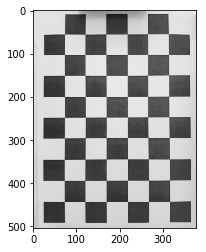

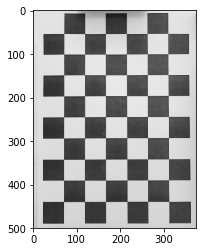

In [16]:
img = cv2.imread('images/camera/01.jpg')
h,w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
print(newcameramtx)
print(roi)
print(img.shape)

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.imshow(img); plt.show()
plt.imshow(dst); plt.show()